In [98]:
import pandas as pd
import phik
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [99]:
df=pd.read_csv('smartphones.csv')
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


In [100]:
print(df.head())
print(df.info())

  brand_name                    model   price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11   38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)   46999         7.5          0   
2      apple  Apple iPhone 11 Pro Max  109900         7.7          0   
3      apple          Apple iPhone 12   51999         7.4          1   
4      apple  Apple iPhone 12 (128GB)   55999         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65            3110.0   
1          bionic        6.0             2.65            3110.0   
2          bionic        6.0             2.65            3500.0   
3          bionic        6.0             3.10               NaN   
4          bionic        6.0             3.10               NaN   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1            60   
1     

Очищаем данные от пропущенных значений и исправляем, если нужно.
Преобразуем типы данных для более удобного анализа.

In [101]:
df.fillna({'fast_charging': 0, 'ram_capacity': 0,'fast_charging_available':0 }, inplace=True)

In [102]:
df['battery_capacity'] = df['battery_capacity'].astype(float)
df['ram_capacity'] = df['ram_capacity'].astype(float)
df['internal_memory'] = df['internal_memory'].astype(float)

In [103]:
df['5G_or_not'] = df['5G_or_not'].map({0: 'No', 1: 'Yes'})
df['fast_charging_available'] = df['fast_charging_available'].map({0: 'No', 1: 'Yes'})

In [104]:
print(df.describe())

               price  avg_rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082    7.825825    7.772074         2.427217   
std     39531.812669    0.740285    0.836845         0.464090   
min      3499.000000    6.000000    4.000000         1.200000   
25%     12999.000000    7.400000    8.000000         2.050000   
50%     19994.500000    8.000000    8.000000         2.300000   
75%     35491.500000    8.400000    8.000000         2.840000   
max    650000.000000    8.900000    8.000000         3.220000   

       battery_capacity  fast_charging  ram_capacity  internal_memory  \
count        969.000000     980.000000    980.000000       980.000000   
mean        4817.748194      36.194898      6.560204       141.036735   
std         1009.540054      35.798919      2.744378       107.134516   
min         1821.000000       0.000000      1.000000         8.000000   
25%         4500.000000      15.000000      4.000

In [105]:
print(df['brand_name'].value_counts())
print(df['model'].value_counts())

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
jio            4
lava           4
redmi          3
lg             3
oukitel        3
letv           3
micromax       3
ikall          3
gionee         3
zte            2
royole         2
lyf            2
lenovo         2
doogee         2
blackview      1
cat            1
cola           1
duoqin         1
blu            1
leitz          1
leeco          1
sharp          1
tcl            1
tesla          1
vertu          1
Name: count, dtype: int64
model
ZTE Axon 40 Ultra 5G               1
Apple iPhone 11                    1
Apple iPhone 11 (128GB)            1
Apple iPhone 11 Pro Max            1
Xiaomi Redmi Note 12 Pro Ma

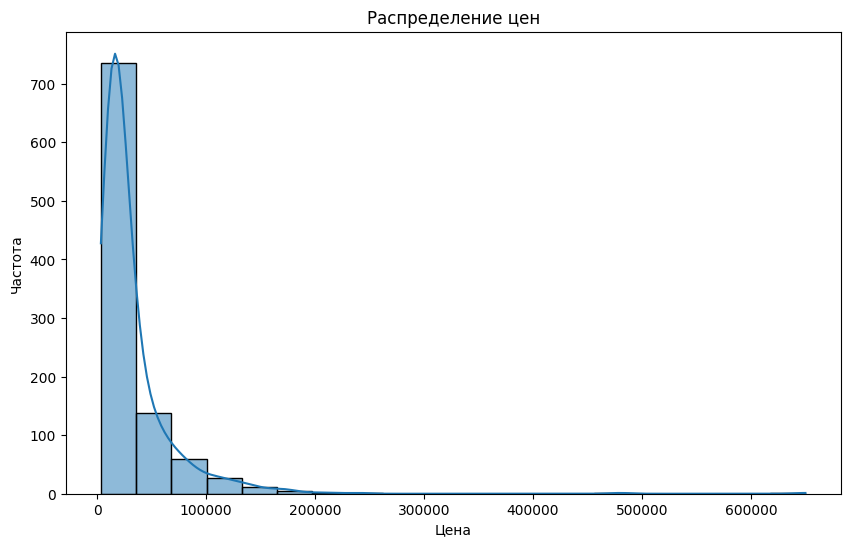

In [106]:
# Распределение цен
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

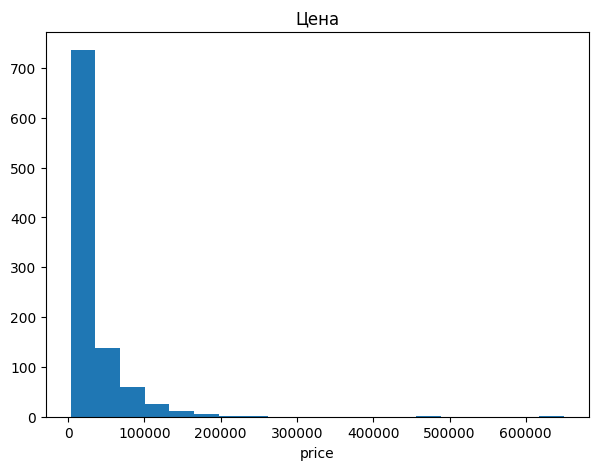

In [107]:
plt.figure(figsize=(7,5))
plt.title('Цена')
plt.hist(df.price, bins=20)
plt.xlabel('price')
plt.show()

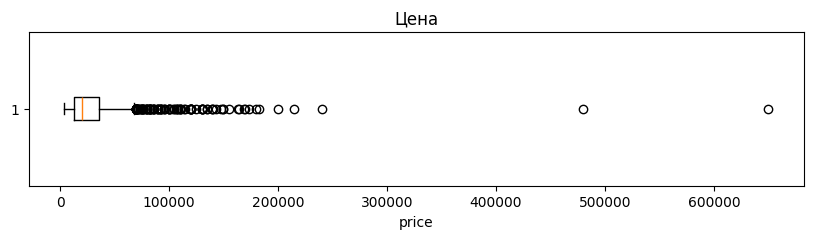

In [108]:
plt.figure(figsize=(10,2))
plt.title('Цена')
plt.boxplot(df.price, vert=False)
plt.xlabel('price')
plt.show()

Видим что есть выбросы, что говорит о наличае товаров премиального сегмента

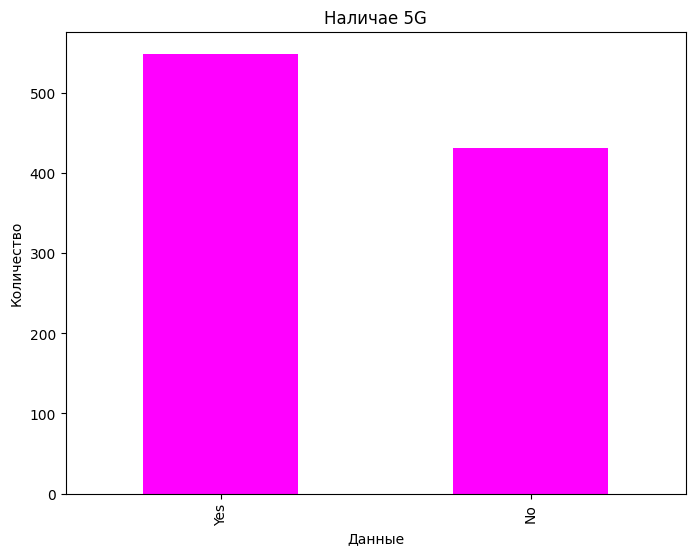

In [109]:
plt.figure(figsize=(8, 6))
df['5G_or_not'].value_counts().plot(kind='bar', color='magenta')
plt.title('Наличае 5G')
plt.xlabel('Данные')
plt.ylabel('Количество')
plt.show()

interval columns not set, guessing: ['price', 'avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'resolution_height', 'resolution_width']


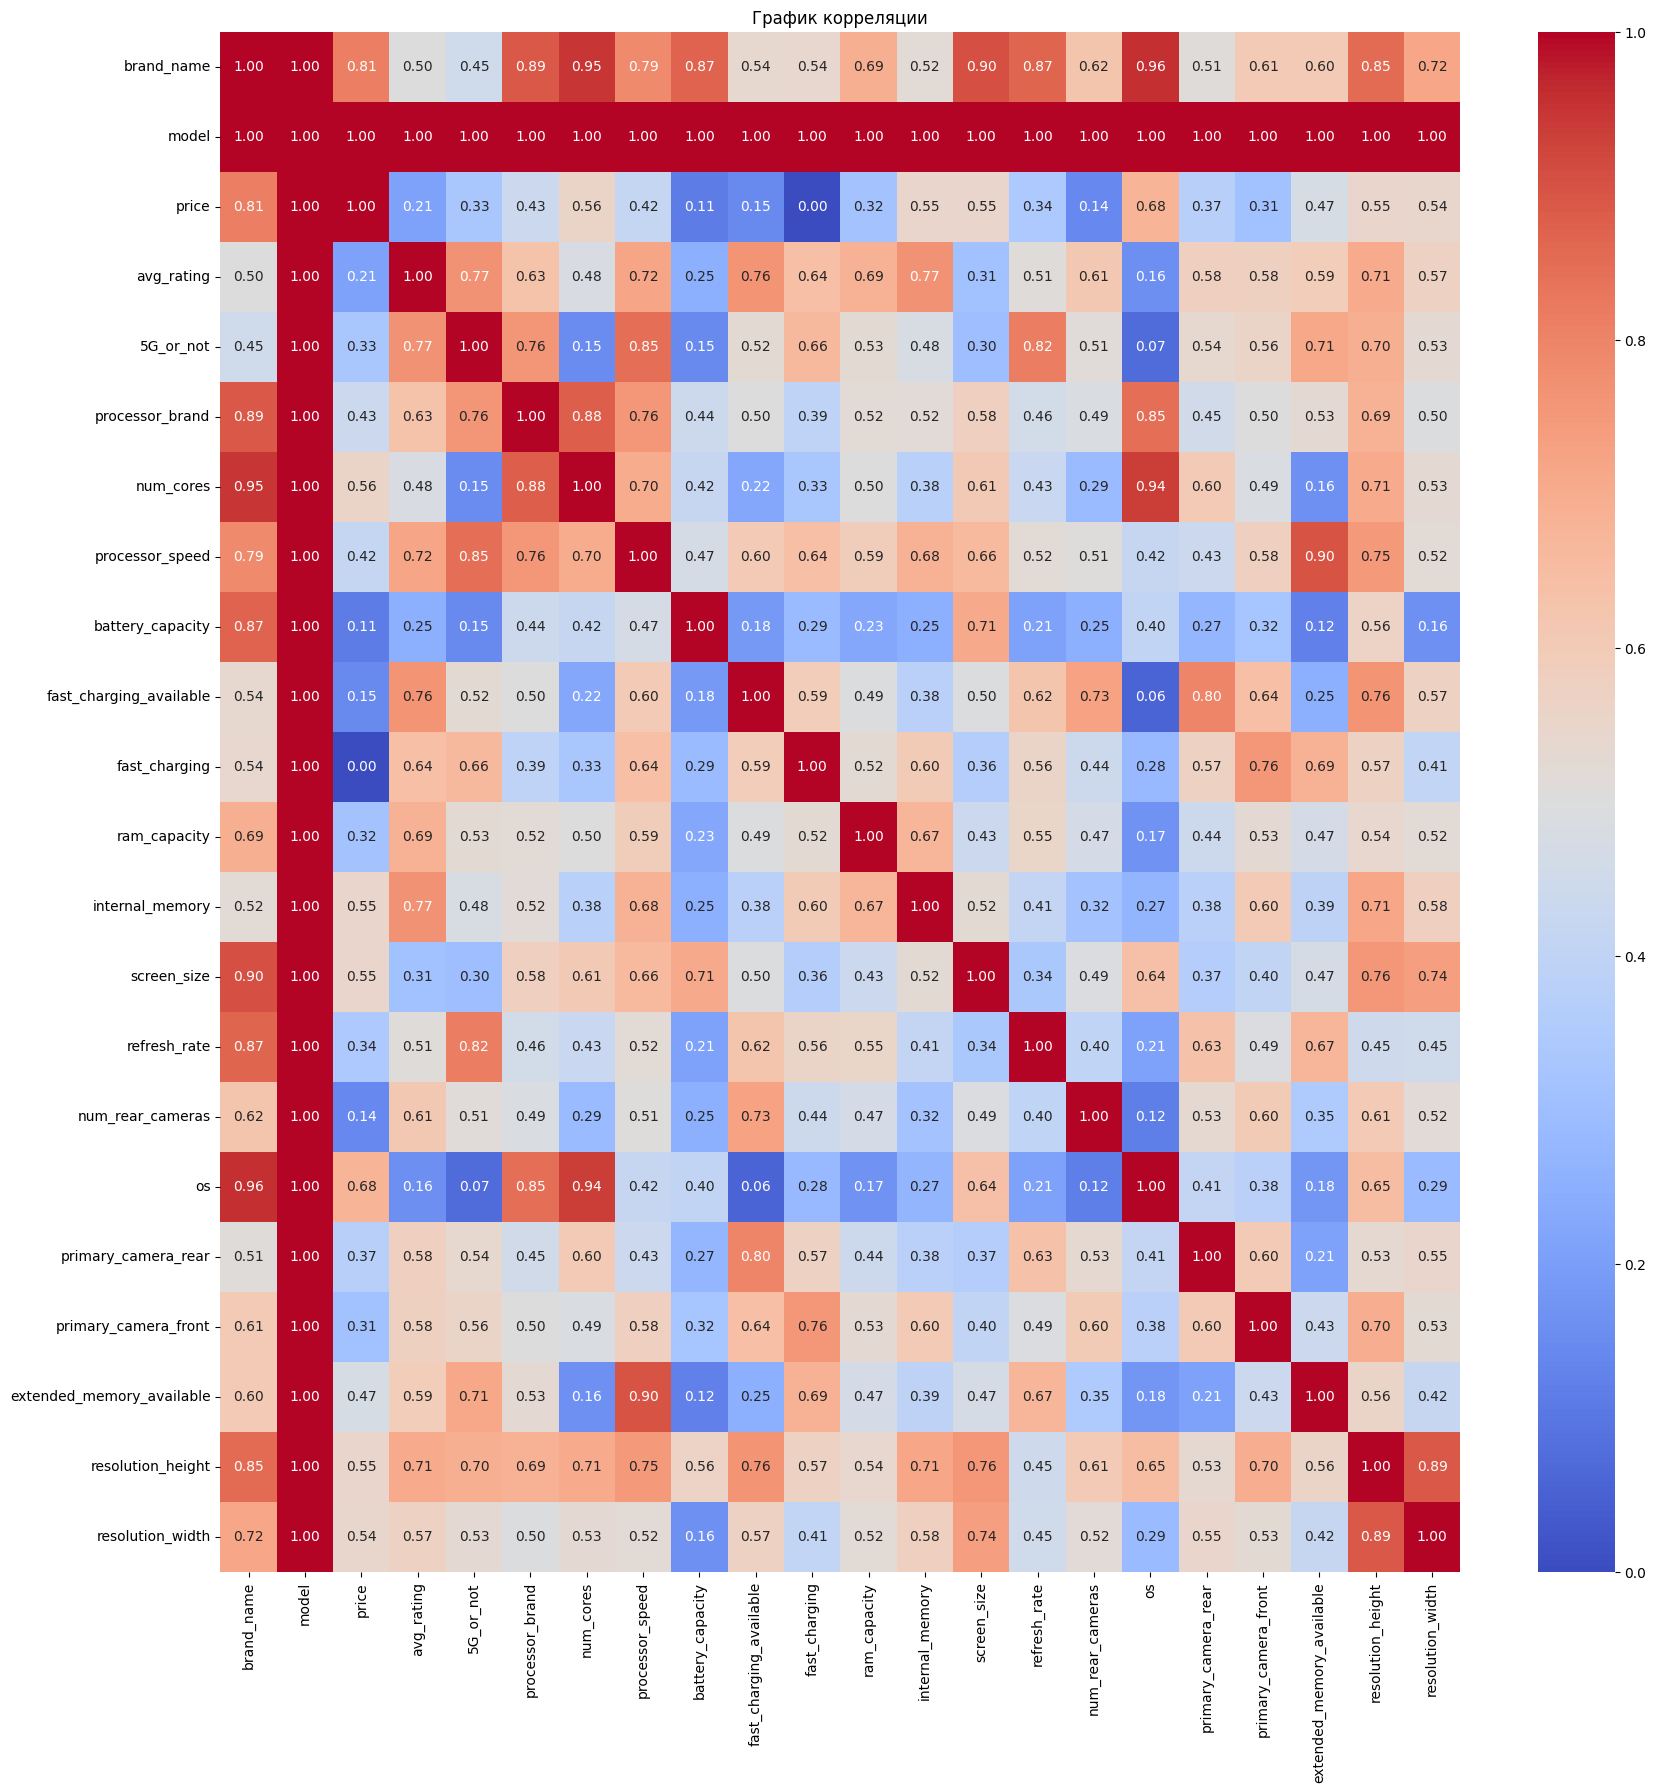

In [124]:
plt.figure(figsize=(20, 20))
phik_corr = df.phik_matrix()
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('График корреляции')
plt.show()

C:\Users\korsh624.VIRO\AppData\Local\Temp\ipykernel_31924\3102252670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.index, y=brand_price.values, palette='viridis')


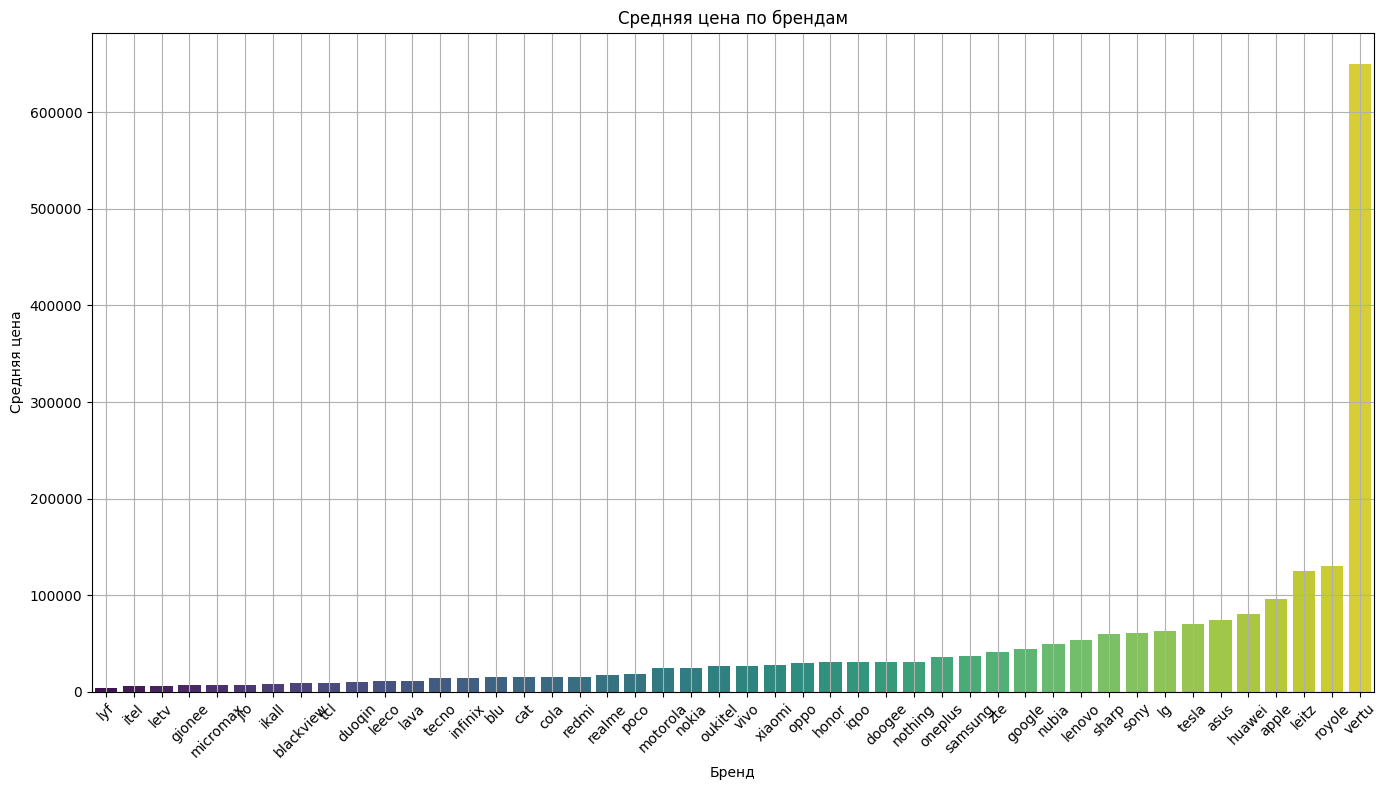

In [111]:
brand_price = df.groupby('brand_name')['price'].mean().sort_values()

# Построение столбчатой диаграммы
plt.figure(figsize=(14, 8))
sns.barplot(x=brand_price.index, y=brand_price.values, palette='viridis')
plt.title('Средняя цена по брендам')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid(True)
plt.tight_layout()  # Автоматическая подгонка элементов графика
plt.show()

Проверим гипотезу что 5G влияет на цену

In [112]:
# Разделение данных на две группы
df_5g = df[df['5G_or_not'] == 'Yes']
df_no_5g = df[df['5G_or_not'] == 'No']

# Проведение t-теста Стьюдента
t_stat, p_value = stats.ttest_ind(df_5g['price'], df_no_5g['price'])

print('T-статистика:', t_stat)
print('P-значение:', p_value)

T-статистика: 10.017848121720302
P-значение: 1.488682162435195e-22


Датасет содержит данные о мобильных телефонах: информацию о бренде, модели, цене, рейтинге, наличии 5G, процессоре и других характеристиках.
Анализ показывает, что на цену значительно влияют такие факторы, как бренд и наличие 5G.
T-тест показал, что наличие 5G имеет статистически значимое влияние на цену (если p-значение меньше 0.05).

In [113]:
data=df.copy()


In [114]:
categorical_features = ['brand_name', '5G_or_not', 'processor_brand', 'fast_charging_available', 'os' ]


In [115]:
onehotencoder = OneHotEncoder()
encoded_features = onehotencoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=onehotencoder.get_feature_names_out(categorical_features))
data = data.drop(columns=categorical_features).join(encoded_df)
data.dropna(inplace=True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 979
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        830 non-null    object 
 1   price                        830 non-null    int64  
 2   avg_rating                   830 non-null    float64
 3   num_cores                    830 non-null    float64
 4   processor_speed              830 non-null    float64
 5   battery_capacity             830 non-null    float64
 6   fast_charging                830 non-null    float64
 7   ram_capacity                 830 non-null    float64
 8   internal_memory              830 non-null    float64
 9   screen_size                  830 non-null    float64
 10  refresh_rate                 830 non-null    int64  
 11  num_rear_cameras             830 non-null    int64  
 12  primary_camera_rear          830 non-null    float64
 13  primary_camera_front     

In [117]:
X = data.drop(columns=['price','model'])
y = data['price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [118]:
# Модель линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)

In [119]:
# Модель дерева решений
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_val)

In [120]:
# Модель случайного леса
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)

In [121]:
# Оценка моделей по метрике RMSE
rmse_lr = mean_squared_error(y_val, pred_lr, squared=False)
rmse_dt = mean_squared_error(y_val, pred_dt, squared=False)
rmse_rf = mean_squared_error(y_val, pred_rf, squared=False)

print(f"RMSE линейной регрессии: {rmse_lr:.2f}")
print(f"RMSE дерева решений: {rmse_dt:.2f}")
print(f"RMSE случайного леса: {rmse_rf:.2f}")

RMSE линейной регрессии: 52835.08
RMSE дерева решений: 52194.63
RMSE случайного леса: 51411.67


c:\Users\korsh624.VIRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\korsh624.VIRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\korsh624.VIRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Лучшей моделью по метрике RMSE является случайный лес.

In [122]:
# Прогноз для тестовой выборки
pred_test = rf.predict(X_test)
rmse_test = mean_squared_error(y_test, pred_test, squared=False)
print(f"RMSE на тестовой выборке: {rmse_test:.2f}")

RMSE на тестовой выборке: 35421.59


c:\Users\korsh624.VIRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Модель случайного леса показала наилучший результат по метрике RMSE среди рассмотренных моделей. Метрика RMSE была выбрана из-за её способности дать прямую интерпретацию ошибки в тех же единицах измерения, что и целевой признак (цена).